In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path

In [3]:
# Question 1 part a

N = 16160
N11 = 150
N01 = 10
N10 = 1000
N00 = 15000
N1p = 150 + 1000
Np1 = 150 + 10
N0p = 10 + 15000
Np0 = 1000 + 15000

op1 = (N*N11)/(N1p*Np1)
op2 = (N*N01)/(N0p*Np1)
op3 = (N*N10)/(N1p*Np0)
op4 = (N*N00)/(N0p*Np0)

MI_prize = (N11/N)*math.log(op1,2) + (N01/N)*math.log(op2,2) + (N10/N)*math.log(op3,2) + (N00/N)*math.log(op4,2)
print(MI_prize)

0.03296011876395397


In [4]:
N = 16160
N11 = 155
N01 = 5
N10 = 14000
N00 = 2000
N1p = 155 + 14000
Np1 = 155 + 5
N0p = 5 + 2000
Np0 = 14000 + 2000

op1 = (N*N11)/(N1p*Np1)
op2 = (N*N01)/(N0p*Np1)
op3 = (N*N10)/(N1p*Np0)
op4 = (N*N00)/(N0p*Np0)

MI_hello = (N11/N)*math.log(op1,2) + (N01/N)*math.log(op2,2) + (N10/N)*math.log(op3,2) + (N00/N)*math.log(op4,2)
print(MI_hello)

0.0007839352232340266


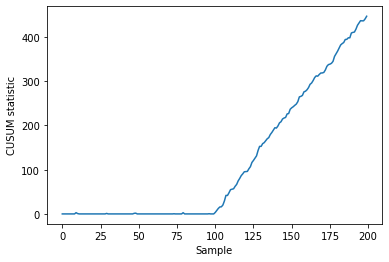

In [22]:
# Question 1 part b

f0 = np.random.normal(0.0, 1.0, 100)
f1 = np.random.normal(3.0, 1.0, 100)
x = np.concatenate((f0, f1)) 

cusum = []
W_t = 0 
for x_t in x:
    W_t = max(0, W_t + 3*x_t - 4.5)
    cusum.append(W_t)

#plt.figure(figsize=(8, 5))
plt.plot(cusum)  
plt.ylabel('CUSUM statistic')
plt.xlabel('Sample')
plt.show()

In [7]:
# Question 2 part a

def generate_data():
    df = pd.read_csv("./data/RealEstate.csv")
    #display(df)

    # preprocess the data by one hot encoding, scaling, and dropping columns
    #print(df.Status.unique())
    df['ShortSale'] = np.where(df['Status'] == 'Short Sale', 1, 0)
    df['ShortSale'] = scale(df.ShortSale.to_numpy())
    df['Foreclosure'] = np.where(df['Status'] == 'Foreclosure', 1, 0)
    df['Foreclosure'] = scale(df.Foreclosure.to_numpy())
    df['Regular'] = np.where(df['Status'] == 'Regular', 1, 0)
    df['Regular'] = scale(df.Regular.to_numpy()) 
    df['Bedrooms'] = scale(df.Bedrooms.to_numpy())
    df['Bathrooms'] = scale(df.Bathrooms.to_numpy())
    df['Size'] = scale(df.Size.to_numpy())
    df['Price/SQ.Ft'] = scale(df['Price/SQ.Ft'].to_numpy())
    df = df.drop(columns=['MLS', 'Location', 'Status'])
    #display(df)

    prices = df.Price.to_numpy()
    data = df.copy().drop(['Price'], axis=1).to_numpy()
    #print(data.shape)
    return data, prices

In [25]:
df = pd.read_csv("./data/RealEstate.csv")
#display(df)

# preprocess the data by one hot encoding, scaling, and dropping columns
#print(df.Status.unique())
df['Short Sale'] = np.where(df['Status'] == 'Short Sale', 1, 0)
df['Foreclosure'] = np.where(df['Status'] == 'Foreclosure', 1, 0)
df['Regular'] = np.where(df['Status'] == 'Regular', 1, 0)
df['Bedrooms'] = scale(df.Bedrooms.to_numpy())
df['Bathrooms'] = scale(df.Bathrooms.to_numpy())
df['Size'] = scale(df.Size.to_numpy())
df['Price/SQ.Ft'] = scale(df['Price/SQ.Ft'].to_numpy())
df = df.drop(columns=['MLS', 'Location', 'Status'])
display(df)

prices = df.Price.to_numpy()
data = df.copy().drop(['Price'], axis=1).to_numpy()
#print(data.shape)

,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Short Sale,Foreclosure,Regular
0,795000.0,-0.166186,0.761236,0.752016,1.062259,1,0,0
1,399000.0,1.003104,0.761236,1.297769,-0.622053,1,0,0
2,545000.0,1.003104,0.761236,1.559046,-0.290251,1,0,0
3,909000.0,1.003104,1.943194,2.179275,0.379526,1,0,0
4,109900.0,-0.166186,-1.602681,-0.617859,-1.088105,1,0,0
...,...,...,...,...,...,...,...,...
776,319900.0,-0.166186,0.761236,-0.183210,-0.120176,0,0,1
777,495000.0,-0.166186,-0.420723,0.148881,0.439869,0,0,1
778,372000.0,-0.166186,-0.420723,-0.794893,1.076692,0,1,0
779,589000.0,-0.166186,-0.420723,0.268531,0.739934,0,0,1


In [32]:
data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=2)

ridge = RidgeCV(alphas = np.arange(1.0, 81.0, .1), cv=5, scoring='neg_mean_squared_error').fit(data, prices)
print(ridge.alpha_)
print(ridge.coef_)

2.200000000000001
[ -9130.40044208  13992.16008174 204224.98412591 210717.11538589
  -5939.68540822   -780.51196034   9246.76436027]


In [64]:
data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=2)
#idx = np.random.permutation(data.shape[0])
#data, prices = data[idx], prices[idx]

params = {'alpha':np.arange(1., 80., .1), 'random_state':[2]}
ridge = Ridge()
model = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error').fit(data, prices)

print(model.best_params_)
best_model = model.best_estimator_
ridge_pred = best_model.predict(data)

mse = 0
for i, pred in enumerate(ridge_pred):
    mse += (prices[i] - pred)**2
print(mse)

{'alpha': 2.200000000000001, 'random_state': 2}
16279704420229.168


16279557605718.582


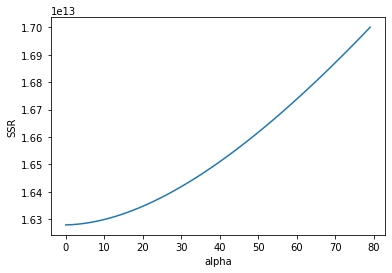

In [62]:
# Ridge regression

data, prices = generate_data()
# shuffle and seed data
#data, prices = shuffle(data, prices, random_state=2)
idx = np.random.permutation(data.shape[0])
data, prices = data[idx], prices[idx]
mse_list = []
cv_scores = []

for a in np.arange(1.0, 81.0):
    
    #ridge = Ridge(alpha = a, random_state=2)
    ridge = RidgeCV(alphas = np.asarray(a), scoring='neg_mean_squared_error')#store_cv_values=True)
    
    #cv_scores.append(np.mean(cross_val_score(ridge, data, prices, cv=5, scoring='neg_mean_squared_error')))
    
    model = ridge.fit(data, prices)
    
    ridge_pred = model.predict(data)
    
    mse = 0
    for i, pred in enumerate(ridge_pred):
        mse += (prices[i] - pred)**2
    mse_list.append(mse)

print(mse_list[1])
plt.plot(mse_list)
plt.xlabel('alpha')
plt.ylabel('SSR')
plt.show()

16278852672837.654


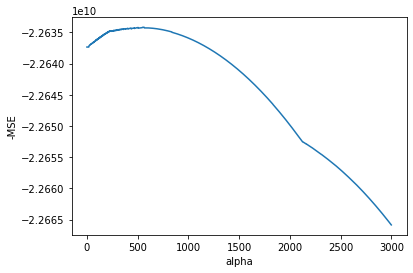

In [67]:
# LASSO regression

data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=3)

mse_list = []
cv_scores = []

for a in np.arange(1., 3000.):
    
    lasso = LassoCV(alphas = np.asarray([a]), cv=5, random_state=3)
    cv_scores.append(np.mean(cross_val_score(lasso, data, prices, cv=5, scoring='neg_mean_squared_error')))
    model = lasso.fit(data, prices)

    lasso_pred = model.predict(data)
    #print(lasso_pred)

    mse = 0
    for i, pred in enumerate(lasso_pred):
        mse += (prices[i] - pred)**2
    mse_list.append(mse)

    
print(mse_list[1])
#plt.plot(mse_list)
plt.plot(cv_scores)
plt.xlabel('alpha')
plt.ylabel('-MSE')
plt.show()

In [37]:
data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=3)

lasso = LassoCV(alphas = np.arange(1., 3000.), cv=5, random_state=3).fit(data, prices)
print(lasso.alpha_)
print(lasso.coef_)

514.0
[ -7991.71086662  12311.33162246 204891.68554937 211242.3098605
  -4595.8644456       0.           9534.70548436]


In [65]:
data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=3)

params = {'alpha':np.arange(1., 3000.), 'random_state':[3]}
lasso = Lasso()
model = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error').fit(data, prices)

print(model.best_params_)
#print(model.best_estimator_.alpha_)
print(model.best_estimator_.coef_)

best_model = model.best_estimator_
lasso_pred = best_model.predict(data)

mse = 0
for i, pred in enumerate(lasso_pred):
    mse += (prices[i] - pred)**2
print(mse)

{'alpha': 564.0, 'random_state': 3}
[ -7854.70842132  12231.61214167 204824.53402867 211237.93639703
  -4556.2705568       0.           9522.35367262]
16280506288104.256


(-0.5756457732460114,
 12.088561238166239,
 -20390.893235912965,
 222329.2933269033)

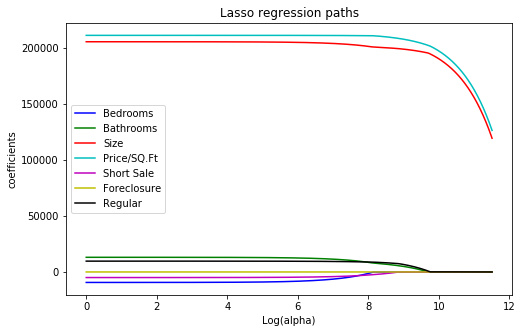

In [71]:
# plotting solution paths
data, prices = generate_data()
data, prices = shuffle(data, prices, random_state=3)
alphas_lasso, coeffs_lasso, _ = lasso_path(data, prices, alphas=np.arange(1., 100000.))


plt.figure(figsize=(8,5))
colors = ["b", "g", "r", "c", "m", "y", "k"]
labels = df.columns[1:]
log_alphas_lasso = np.log(alphas_lasso)
#neg_log_alphas_lasso = alphas_lasso

for coeff, c, label in zip(coeffs_lasso, colors, labels):
    #plt.figure()
    l1 = plt.plot(log_alphas_lasso, coeff, c=c, label=label)

plt.xlabel("Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso regression paths")
plt.legend(labels, loc="best")
plt.axis("tight")

In [45]:
# Question 3 scratch work 

import math

Z1 = 0
D1 = [.125, .125, .125, .125, .125, .125, .125, .125] 
y = [1, 1, -1, -1, 1, 1, -1, -1]
h = [1, 1, -1, -1, -1, -1, -1, -1]
a = .5*np.log(3)

for i in range(8):
    Z1 += D1[i]*math.exp(-a*y[i]*h[i])

print(Z1) 
    

0.8660254037844388


In [47]:
Z2 = 0
D2 = [.0833, .0833, .0833, .0833, .25, .25, .0833, .0833] 
y = [1, 1, -1, -1, 1, 1, -1, -1]
h = [-1, -1, -1, -1, 1, 1, -1, -1]
a = .7698

for i in range(8):
    Z2 += D2[i]*math.exp(-a*y[i]*h[i])

print(Z2)

D3 = []
for i in range(8):
    D3.append((D2[i]/Z2)*math.exp(-a*y[i]*h[i]))

0.745604754395635


In [49]:
D3

[0.24124383565422058,
 0.24124383565422058,
 0.05173881058570192,
 0.05173881058570192,
 0.1552785431743755,
 0.1552785431743755,
 0.05173881058570192,
 0.05173881058570192]

In [50]:
Z3 = 0
y = [1, 1, -1, -1, 1, 1, -1, -1]
h = [1, 1, -1, -1, 1, 1, 1, 1]
a = 1.08

for i in range(8):
    Z3 += D3[i]*math.exp(-a*y[i]*h[i])

print(Z3)

0.6091634235470862


In [53]:
# Part b

h1 = [1, 1, -1, -1, -1, -1, -1, -1]
h2 = [-1, -1, -1, -1, 1, 1, -1, -1]
h3 = [1, 1, -1, -1, 1, 1, 1, 1]

pred = []
points = [[-1,0], [-.5,.5], [0,1], [0.5,1], [1,0], [1,-1], [0,-1], [0,0]]
for i in range(8):
    pred.append(int(np.sign(.5493*h1[i] + .7698*h2[i] + 1.08*h3[i]))) 

miss = 0    
for p in pred:
    if pred[p] != y[p]: miss+= 1
        
print(pred)        
print(miss/len(pred))

[1, 1, -1, -1, 1, 1, -1, -1]
0.0
